In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")


In [404]:
# Load the dambu datset
df = pd.read_csv("dambu_dataset.csv")
df

,Subject_ID,Gender,Age,Dambu_Type,Portion_Size_g,Boiled,Carb_Percent,Protein_Percent,Fat_Percent,Fiber_Percent,...,Glucose_120min_mmol_L,IAUC_Test_Meal,IAUC_Standard_Meal,Calculated_Glycemic_Index_Percent,Flavor,Taste,Texture,Consistency,Color,Overall_Acceptability
0,S001,Male,24.4,Maize,138.8,0,62.0,11.0,11.1,8.4,...,4.29,43.81,5473.92,38.12,7.85,7.12,6.18,6.39,7.44,8.33
1,S001,Male,24.4,Millet,138.8,0,56.6,9.8,11.2,7.0,...,5.67,50.01,6489.50,44.57,8.73,7.09,6.85,6.62,6.71,6.81
2,S002,Male,28.1,Maize,134.1,0,59.5,11.3,10.2,8.1,...,4.03,40.87,6656.51,41.88,6.18,8.42,7.69,6.06,7.09,8.15
3,S002,Male,28.1,Millet,134.1,0,59.8,10.5,11.1,7.8,...,4.56,40.78,5940.11,44.69,5.84,7.90,5.99,8.47,7.85,7.14
4,S003,Male,25.8,Maize,60.1,0,58.1,11.2,11.6,8.3,...,4.02,39.47,5373.53,39.05,7.44,8.06,4.63,7.88,7.30,7.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,S098,Female,34.5,Millet,119.3,1,51.6,11.0,9.8,8.5,...,5.13,51.70,5335.46,44.00,8.52,6.85,7.68,6.26,7.85,6.68
196,S099,Female,23.3,Maize,68.9,0,61.2,10.4,12.6,8.0,...,6.02,54.20,5796.38,39.72,9.00,8.26,6.30,6.56,7.27,7.57
197,S099,Female,23.3,Millet,68.9,0,62.4,11.5,10.4,8.4,...,4.36,39.15,5565.19,42.33,7.06,8.59,5.73,6.60,8.51,7.13
198,S100,Female,18.8,Maize,115.3,0,64.7,11.2,11.3,8.5,...,3.06,30.63,5744.80,41.50,6.35,6.40,6.54,6.69,6.98,8.47


In [405]:
df.shape

(200, 24)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subject_ID                         200 non-null    object 
 1   Gender                             200 non-null    object 
 2   Age                                200 non-null    float64
 3   Dambu_Type                         200 non-null    object 
 4   Portion_Size_g                     200 non-null    float64
 5   Boiled                             200 non-null    int64  
 6   Carb_Percent                       200 non-null    float64
 7   Protein_Percent                    200 non-null    float64
 8   Fat_Percent                        200 non-null    float64
 9   Fiber_Percent                      200 non-null    float64
 10  Glucose_Fasting_mmol_L             200 non-null    float64
 11  Glucose_30min_mmol_L               200 non-null    float64

In [407]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [408]:
# Check for the nan values
df.isnull().sum()

Subject_ID                           0
Gender                               0
Age                                  0
Dambu_Type                           0
Portion_Size_g                       0
Boiled                               0
Carb_Percent                         0
Protein_Percent                      0
Fat_Percent                          0
Fiber_Percent                        0
Glucose_Fasting_mmol_L               0
Glucose_30min_mmol_L                 0
Glucose_60min_mmol_L                 0
Glucose_90min_mmol_L                 0
Glucose_120min_mmol_L                0
IAUC_Test_Meal                       0
IAUC_Standard_Meal                   0
Calculated_Glycemic_Index_Percent    0
Flavor                               0
Taste                                0
Texture                              0
Consistency                          0
Color                                0
Overall_Acceptability                0
dtype: int64

In [409]:
df.columns

Index(['Subject_ID', 'Gender', 'Age', 'Dambu_Type', 'Portion_Size_g', 'Boiled',
       'Carb_Percent', 'Protein_Percent', 'Fat_Percent', 'Fiber_Percent',
       'Glucose_Fasting_mmol_L', 'Glucose_30min_mmol_L',
       'Glucose_60min_mmol_L', 'Glucose_90min_mmol_L', 'Glucose_120min_mmol_L',
       'IAUC_Test_Meal', 'IAUC_Standard_Meal',
       'Calculated_Glycemic_Index_Percent', 'Flavor', 'Taste', 'Texture',
       'Consistency', 'Color', 'Overall_Acceptability'],
      dtype='object')

In [410]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,41.97100,14.003447,18.30,28.3250,42.400,55.0000,64.60
Portion_Size_g,200.0,104.80800,28.742855,50.20,83.9500,105.450,132.2750,149.10
Boiled,200.0,0.52000,0.500854,0.00,0.0000,1.000,1.0000,1.00
Carb_Percent,200.0,61.10750,3.065023,51.60,59.3000,60.900,63.2000,69.50
Protein_Percent,200.0,11.36400,0.535667,9.80,11.0000,11.300,11.7000,12.90
Fat_Percent,200.0,11.21450,0.600870,9.20,10.8000,11.200,11.6000,13.10
Fiber_Percent,200.0,8.19750,0.420270,7.00,7.9000,8.200,8.5000,9.30
Glucose_Fasting_mmol_L,200.0,5.00330,0.727089,2.96,4.5575,4.940,5.4625,7.04
Glucose_30min_mmol_L,200.0,5.99460,0.875253,3.55,5.4725,5.940,6.5600,8.44
Glucose_60min_mmol_L,200.0,5.50975,0.805643,3.36,4.9975,5.480,6.0400,7.89


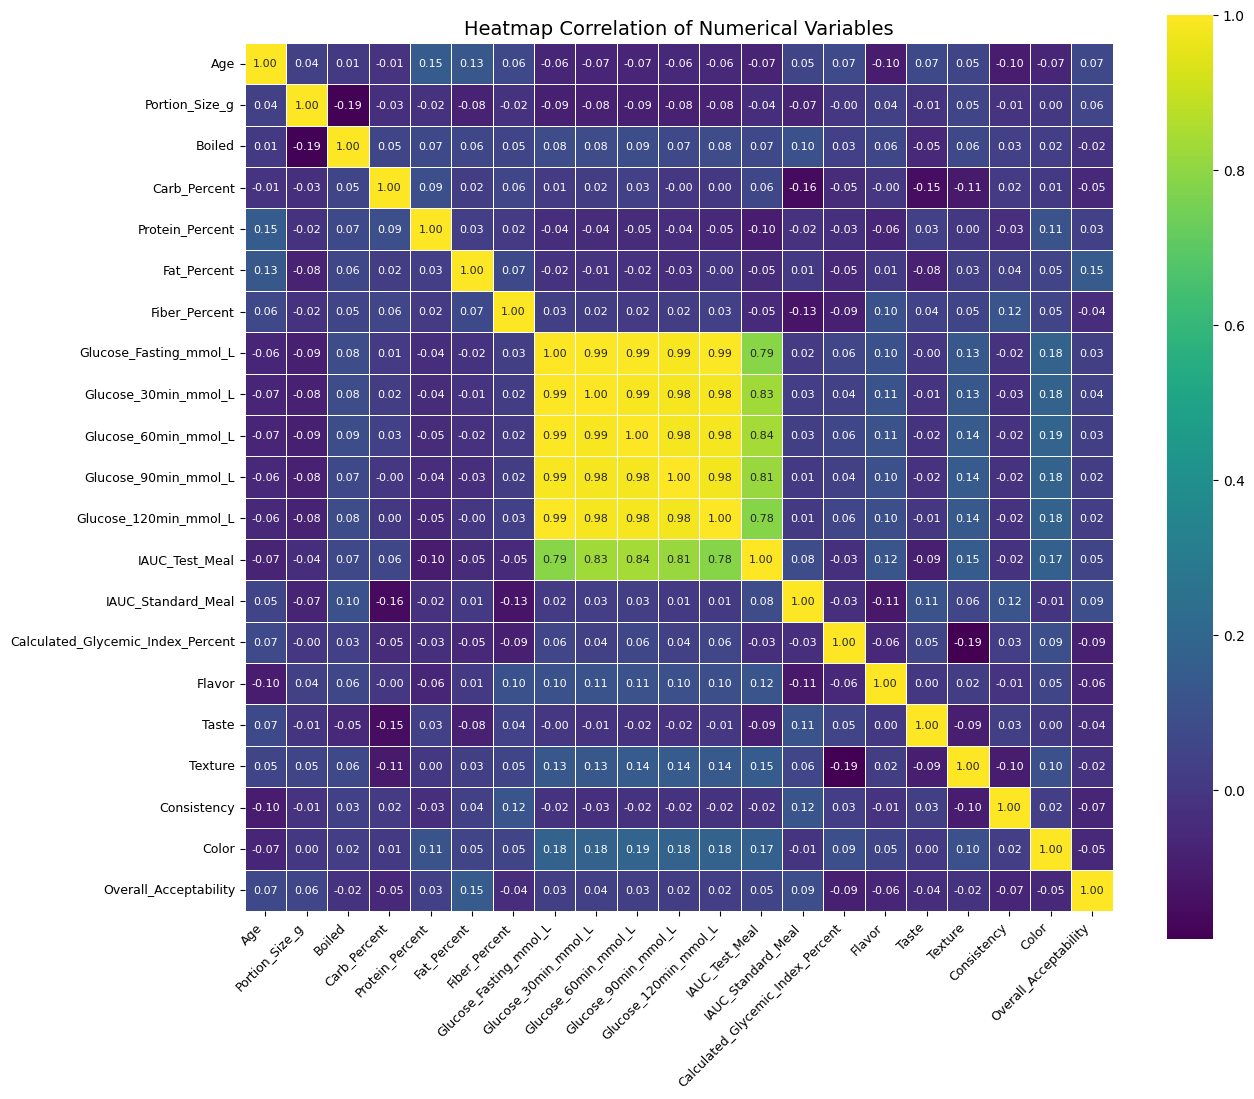

In [411]:
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include='number')

# Compute correlation
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 12))  # Larger figure
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    square=True, 
    cbar=True, 
    linewidths=0.5, 
    annot_kws={"size": 8}
)

plt.title("Heatmap Correlation of Numerical Variables", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout
plt.show()


**The following variables have strong correlations**

IAUC_Test_Meal vs:

Glucose_30min_mmol_L = 0.79

Glucose_60min_mmol_L = 0.83

Glucose_90min_mmol_L = 0.84

Glucose_120min_mmol_L = 0.78

IAUC_Test_Meal vs IAUC_Standard_Meal = 0.78

IAUC_Standard_Meal vs Calculated_Glycemic_Index_Percent = 0.99


<Figure size 2000x2000 with 0 Axes>

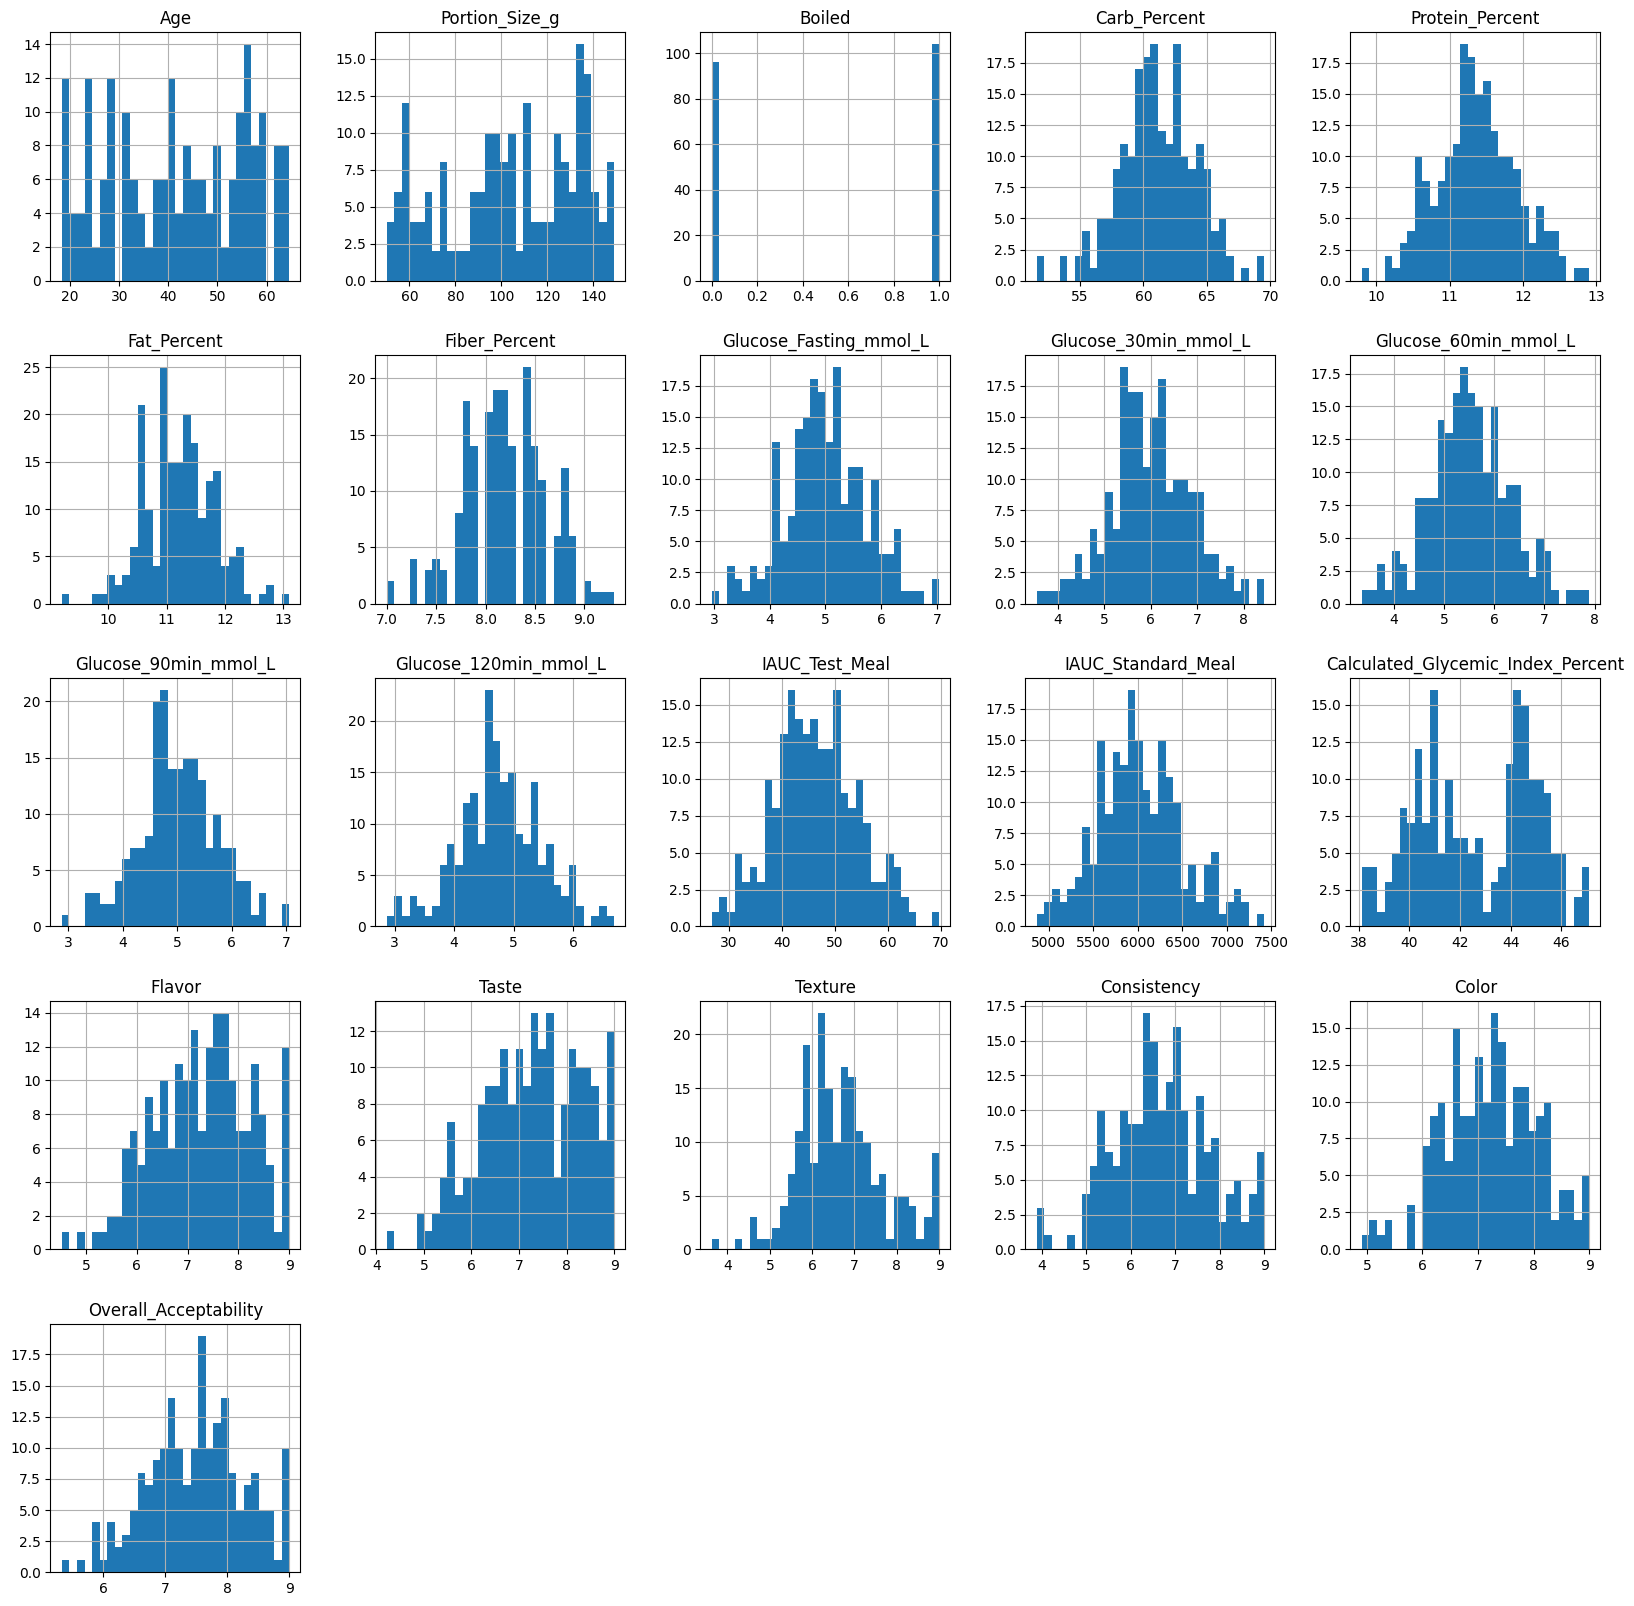

In [412]:
plt.figure(figsize=(20, 20))      
df.hist(bins=30, figsize=(20, 20))  
plt.title("Data Distribution")
plt.tight_layout
plt.show()

## Glycemic Index Model
**Predict the glycemic index of local meals based on their nutritional compositions**



In [413]:
# Separate the features from the target variable
X = df.drop(['Calculated_Glycemic_Index_Percent'], axis=1)
y = df['Calculated_Glycemic_Index_Percent']

In [414]:
# Segreggate the X variables into numeric and categorical
X_categoric = ['Dambu_Type']
X_numeric =  ['Carb_Percent', 'Protein_Percent', 'Fat_Percent', 'Fiber_Percent', 'Portion_Size_g',
             'IAUC_Test_Meal', 'IAUC_Standard_Meal']
       

In [415]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline

In [416]:
# Numerical pipeline
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Categorical pipeline
categoric_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numeric_pipeline, X_numeric),
    ('categorical', categoric_pipeline, X_categoric)
])

In [418]:
# To train the model using lasso regression algorithm
random_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])
random_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('random_regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [419]:
# To predict with test set
y_pred = random_model.predict(X_test)

# To evalute with metrics
mse = mean_squared_error(y_test, y_pred)
r_score = r2_score(y_test, y_pred)

print(f"Mean Square Error: {mse:.2f}")
print(f"R-Square-Score: {r_score:.2f}")

Mean Square Error: 1.68
R-Square-Score: 0.62


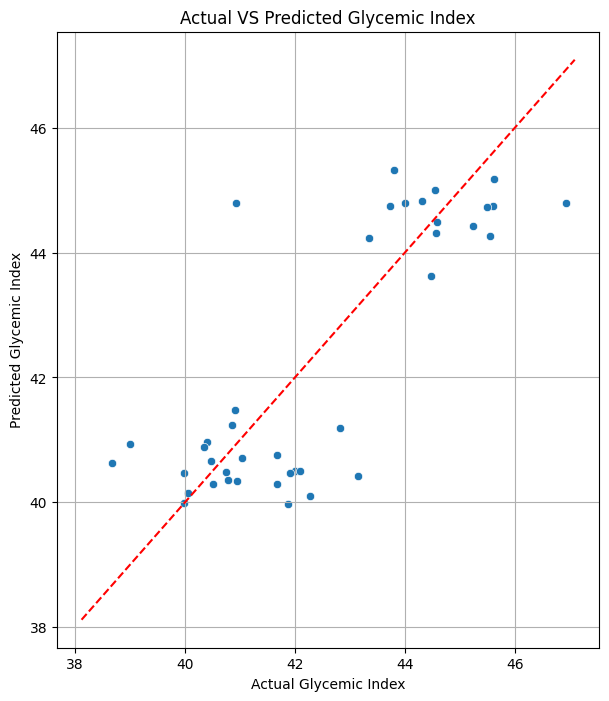

In [420]:
# To visualize the result
plt.figure(figsize=(7,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Glycemic Index")
plt.ylabel("Predicted Glycemic Index")
plt.title("Actual VS Predicted Glycemic Index")
plt.plot([y.min(),y.max()],[y.min(),y.max()], "--", color="red")
plt.grid(True)
plt.show()

In [421]:
# To save the model
joblib.dump(random_model,"glycemic_index_model")

['glycemic_index_model']

### Diabetic Risk(Glucose Response) Model
##### The following variables have strong correlation so one of them must be dropped against one another
##### to prevent multicollinearity.
##### IAUC_Test_Meal vs:
##### Glucose_30min_mmol_L = 0.79
##### Glucose_60min_mmol_L = 0.83
##### Glucose_90min_mmol_L = 0.84
##### Glucose_120min_mmol_L = 0.78
##### IAUC_Test_Meal vs IAUC_Standard_Meal = 0.78
##### IAUC_Standard_Meal vs Calculated_Glycemic_Index_Percent = 0.99

In [422]:
df.columns

Index(['Subject_ID', 'Gender', 'Age', 'Dambu_Type', 'Portion_Size_g', 'Boiled',
       'Carb_Percent', 'Protein_Percent', 'Fat_Percent', 'Fiber_Percent',
       'Glucose_Fasting_mmol_L', 'Glucose_30min_mmol_L',
       'Glucose_60min_mmol_L', 'Glucose_90min_mmol_L', 'Glucose_120min_mmol_L',
       'IAUC_Test_Meal', 'IAUC_Standard_Meal',
       'Calculated_Glycemic_Index_Percent', 'Flavor', 'Taste', 'Texture',
       'Consistency', 'Color', 'Overall_Acceptability'],
      dtype='object')

In [423]:
df.drop(['Glucose_90min_mmol_L','Glucose_60min_mmol_L',
         'Subject_ID','Glucose_30min_mmol_L','IAUC_Standard_Meal',
          'Flavor', 'Taste', 'Texture','IAUC_Test_Meal',
       'Consistency', 'Color',
         'Overall_Acceptability','Calculated_Glycemic_Index_Percent'], axis=1, inplace=True)

In [424]:
df.head()

,Gender,Age,Dambu_Type,Portion_Size_g,Boiled,Carb_Percent,Protein_Percent,Fat_Percent,Fiber_Percent,Glucose_Fasting_mmol_L,Glucose_120min_mmol_L
0,Male,24.4,Maize,138.8,0,62.0,11.0,11.1,8.4,4.56,4.29
1,Male,24.4,Millet,138.8,0,56.6,9.8,11.2,7.0,5.82,5.67
2,Male,28.1,Maize,134.1,0,59.5,11.3,10.2,8.1,4.12,4.03
3,Male,28.1,Millet,134.1,0,59.8,10.5,11.1,7.8,4.59,4.56
4,Male,25.8,Maize,60.1,0,58.1,11.2,11.6,8.3,4.17,4.02


In [425]:
df['Boiled'].value_counts()

Boiled
1    104
0     96
Name: count, dtype: int64

In [426]:
# Separate the target variable from the features
X = df.drop(['Glucose_120min_mmol_L'], axis=1)
y = df['Glucose_120min_mmol_L']

In [427]:
# Categorical X features
X_categorical =  ['Gender', 'Dambu_Type']

# Numerical X features
X_numerical = ['Age', 'Portion_Size_g', 'Boiled', 'Carb_Percent', 'Protein_Percent',
       'Fat_Percent', 'Fiber_Percent', 'Glucose_Fasting_mmol_L']


In [428]:
X_categorical

['Gender', 'Dambu_Type']

In [429]:
X_numerical

['Age',
 'Portion_Size_g',
 'Boiled',
 'Carb_Percent',
 'Protein_Percent',
 'Fat_Percent',
 'Fiber_Percent',
 'Glucose_Fasting_mmol_L']

#### Pipeline

In [430]:
# Numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
])

# Categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_pipeline, X_numerical),
    ('categorical', categorical_pipeline, X_categorical)
])

In [431]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [433]:
# To train the model using ridge regression algorithm
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear_regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('linear_regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [434]:
y_predict = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
r_square = r2_score(y_test, y_predict)

print(f"Mean Square Error: {mse:.2f}")
print(f"R-Square Error: {r_square:.2f}")

Mean Square Error: 0.01
R-Square Error: 0.98


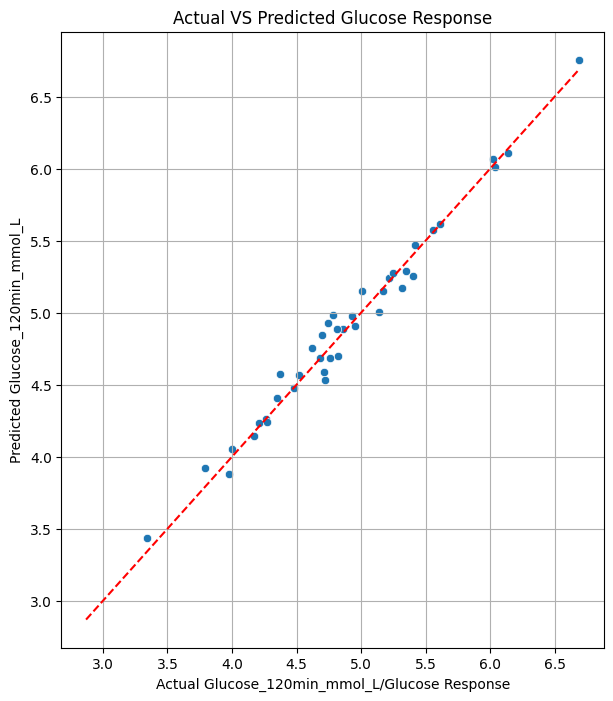

In [435]:
# To visualize the result
plt.figure(figsize=(7,8))
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel("Actual Glucose_120min_mmol_L/Glucose Response")
plt.ylabel("Predicted Glucose_120min_mmol_L")
plt.title("Actual VS Predicted Glucose Response")
plt.plot([y.min(),y.max()],[y.min(),y.max()], "--", color="red")
plt.grid(True)
plt.show()

## Bacteria Antibiotic Resistance Simulation

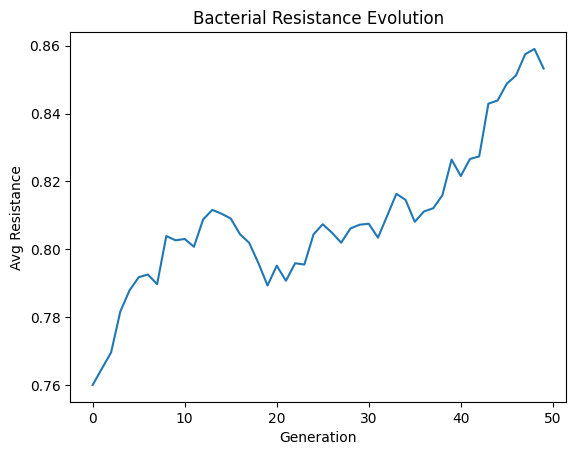

In [ ]:


class Bacterium:
    def __init__(self, resistance):
        self.resistance = resistance

    def reproduce(self, mutation=0.05):
        r = max(0, min(1, self.resistance + random.uniform(-mutation, mutation)))
        return Bacterium(r)

def simulate(gen=50, init_pop=100, thresh=0.5):
    pop = [Bacterium(random.random()) for _ in range(init_pop)]
    avg_res = []

    for _ in range(gen):
        survivors = [b for b in pop if b.resistance >= thresh]
        if not survivors:
            break
        avg_res.append(sum(b.resistance for b in survivors) / len(survivors))
        pop = [b.reproduce() for b in survivors]  # one offspring per survivor

    return avg_res

resistances = simulate()
plt.plot(resistances)
plt.xlabel('Generation')
plt.ylabel('Avg Resistance')
plt.title('Bacterial Resistance Evolution')
plt.savefig('bacterial_resistance_evolution.png') 
plt.show()
